In [5]:
import time
import lda
execfile('load_data.py')
execfile('nlp_code/corpus.py')
execfile('nlp_code/document.py')

In [2]:
print data.shape
documents[0]

(823, 30)


u"Of all the deprivations of being homeless, the worst was believing I had nothing to give.\\n\\nA few years ago I found myself homeless. There was no good excuse for it. I had an excellent upbringing, I have a college degree, I had had a career in public relations, but then several things happened at once - I quit working, my mother died, I let my clinical depression go unchecked and untreated and simply lost all my savings, then my home, then my belongings. The only thing I had left was my pride, which isolated me from my friends and family and prevented me from getting the help I needed.\\n\\nOddly enough, it wasn't the possessions or the stability I missed most - it was the fact that I didn't feel like I was contributing. I wasn't using my talents, and I wasn't donating to things which had always been important to me. I wasn't even volunteering.\\n\\nI finally got help, entered a shelter run by Inter-Faith Ministries, started taking an anti-depressant, reached out to people and beg

In [3]:
t0 = time.time()
corpus = Corpus(documents, 'nlp_code/stopwords.txt', 2)
t1 = time.time()

corpus.generate_document_term_matrix()
corpus.generate_idfv()
corpus.generate_tf_idf()
termlist = list(corpus.token_set)
print 'Sanity checks:'
print '\tTime to build corpus: ' + str(t1 - t0)
print '\tTerms in first document: ' + str(corpus.docs[0].tokens)
print '\tTotal words in corpus: ' + str(corpus.ntotal_tokens)
print '\tNumber docs in corpus: ' + str(corpus.N)
print '\tNumber of unique words in corpus: ' + str(len(corpus.token_set))

counting terms for doc: 0
counting terms for doc: 25
counting terms for doc: 50
counting terms for doc: 75
counting terms for doc: 100
counting terms for doc: 125
counting terms for doc: 150
counting terms for doc: 175
counting terms for doc: 200
counting terms for doc: 225
counting terms for doc: 250
counting terms for doc: 275
counting terms for doc: 300
counting terms for doc: 325
counting terms for doc: 350
counting terms for doc: 375
counting terms for doc: 400
counting terms for doc: 425
counting terms for doc: 450
counting terms for doc: 475
counting terms for doc: 500
counting terms for doc: 525
counting terms for doc: 550
counting terms for doc: 575
counting terms for doc: 600
counting terms for doc: 625
counting terms for doc: 650
counting terms for doc: 675
counting terms for doc: 700
counting terms for doc: 725
counting terms for doc: 750
counting terms for doc: 775
counting terms for doc: 800
counting terms for doc: 0
counting terms for doc: 25
counting terms for doc: 50
c

In [7]:
tf_idf_matrix = np.array(corpus.tf_idf, dtype = 'int')

model = lda.LDA(n_topics=10, n_iter=1000, random_state=1)
time0 = time.time()
model.fit(tf_idf_matrix)
time1 = time.time()

print 'Time spent running LDA: {0}'.format(time1-time0)

In [13]:
topic_word = model.topic_word_  # model.components_ also works
n_top_words = 8
vocab = np.array(list(corpus.token_set))
print len(topic_word[0])
for i, topic_dist in enumerate(topic_word):
    top_word_idcs = list(np.argsort(topic_dist))
    top_word_idcs.reverse()
    topic_words = vocab[top_word_idcs[0:n_top_words]]
    topic_words = [word.encode('UTF-8') for word in topic_words]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

10828
Topic 0: nicu pacer autism babi neonat born womb kulturec
Topic 1: cancer diseas diagnos treatment brain research cure diagnosi
Topic 2: student school youth skill teacher dream class program
Topic 3: dog adopt rescu cat anim pet foster shelter
Topic 4: disabl abus lighthous inc stabl heâ sexual traffick
Topic 5: camp camper adapt ski vermont hors cmt write
Topic 6: wildlif anim virginia forest flight refug bird fli
Topic 7: hi play women everyth room team don return
Topic 8: danc music perform art film artist theater dancer
Topic 9: villag haiti nepal contribut earthquak women india partner


In [65]:
likelihoods = []
iters = 500
n_topics_range = range(5,50,5)

for nt in n_topics_range:
    model = lda.LDA(n_topics=nt, n_iter=iters, random_state=1)
    model.fit(tf_idf_matrix)
    likelihoods.append(model.loglikelihood())

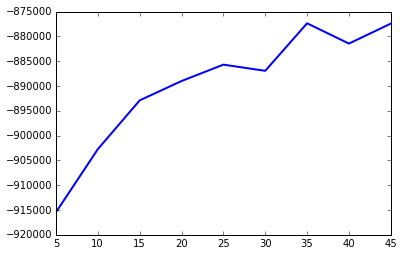

In [66]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

%matplotlib inline
line, = plt.plot(n_topics_range, likelihoods, linewidth=2)

plt.show()

In [20]:
likelihoods = []
n_iters_range = [i*10**exp for exp in range(2, 4) for i in range(1, 4)]
# [100, 200, 300, 1000, 2000, 3000]
n_topics = 20

for ni in n_iters_range:
    model = lda.LDA(n_topics=n_topics, n_iter=ni, random_state=1)
    model.fit(tf_idf_matrix)
    likelihoods.append(model.loglikelihood())

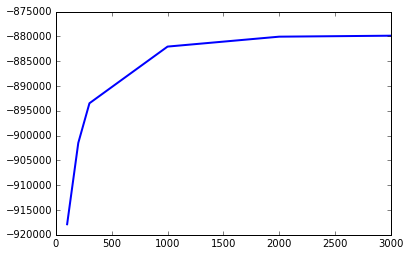

In [21]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

%matplotlib inline
line, = plt.plot(n_iters_range, likelihoods, linewidth=2)

plt.show()

In [10]:
n_topics, n_iters = [20,1000]
model = lda.LDA(n_topics=n_topics, n_iter=n_iters, random_state=1)
model.fit(tf_idf_matrix)

<lda.lda.LDA instance at 0x10a909830>

In [11]:
topic_word = model.topic_word_  # model.components_ also works
n_top_words = 8
vocab = np.array(list(corpus.token_set))
print len(topic_word[0])
for i, topic_dist in enumerate(topic_word):
    top_word_idcs = list(np.argsort(topic_dist))
    top_word_idcs.reverse()
    topic_words = vocab[top_word_idcs[0:n_top_words]]
    topic_words = [word.encode('UTF-8') for word in topic_words]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

10827
Topic 0: net justic malaria must alumni institut human student
Topic 1: respons baltimor certif book cancer sacr paul write
Topic 2: haiti villag creek turpentin tiger india orphan trip
Topic 3: dog anim cat rescu adopt foster pet shelter
Topic 4: pacer run marathon race pasadena runner ski vermont
Topic 5: mental ill depress health aspect addict emot equal
Topic 6: danc art perform film artist chicago dancer theater
Topic 7: youth school global student teacher empow achiev scholarship
Topic 8: wildlif virginia music eagl center wcv cam perform
Topic 9: nepal earthquak intern solar disast villag garden hot
Topic 10: hors disabl flight ride rider fli buffalo catcher
Topic 11: autism kulturec forest toy ipad santa georgia spectrum
Topic 12: aneurysm veteran brain ruptur ohio militari retreat karma
Topic 13: bird overlook jar habitat emot balloon cage tune
Topic 14: cancer diseas research diagnos cure treatment diagnosi battl
Topic 15: hi everyth room didn doctor night let mind
Topi

In [30]:
doc_topic = model.doc_topic_
n_cols = data.shape[1]
doc_topic_cols = range(n_cols, n_cols+n_topics)
data_plus = np.concatenate((data, doc_topic), axis=1)
story_idx = 10
obs_story = data_plus.item((story_idx,story_text_column_idx))
print obs_story
print np.argmax(data_plus[story_idx,:][doc_topic_cols])
print data_plus[story_idx,:][doc_topic_cols]

Giving the gift of a smile.\nDoesn't get any better than that. We live basically paycheck to almost paycheck and things have always been tight. But a little over 2 years ago my 2 year old was officially diagnosed autistic. And honestly I'd barely heard of it. I cried for days, I sank into a pitty of tears and why me, why my daughter. I felt scared as if I had failed her. Then I googled, I searched, I looked high and low. I found many sites the first one not so helpful, I won't name any names but I'll say they offered me a packet to do a fundraiser and walk for them. However they were unable to help me with any other help as my daughter wasn't in their criteria as considered she was a girl and not a boy and I guess they is more of a boy issue ( funny I've got three girls on various end of the spectrum and not a boy one ) . Then I found Kulturecity and was instantly welcomed, I got various opinions from their 'groupies' on their page . My girls were sent a toy and man the smile on their 

/Users/aimeebarciauskas/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [64]:
# key column, story_text_column, doc_topic columns
doc_topic_cols = range(n_cols, n_cols+n_topics)
doc_topic_cols.insert(0,0)
print doc_topic_cols
data_trunc =  data_plus[:,doc_topic_cols]
data_trunc[:,0] = map(int, data_trunc[:,0])

fmts = ['%3i']
fmts.extend(['%10.5f']*n_topics)
np.savetxt('data_plus.csv', data_trunc, delimiter=',', fmt=fmts)

[0, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
